## Importing required libraries

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Layer
from keras.utils import np_utils
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

## Extracting data from zip file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/forest_fire.zip') as file:
    file.extractall("")

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# files in data folder
os.listdir('/content/forest_fire')

['Testing', 'Train']

## Reading contents inside the folder

In [6]:
print(len(os.listdir('/content/forest_fire/Train/fire')))
print(len(os.listdir('/content/forest_fire/Train/nofire')))

928
904


## Separating images and labels

In [7]:
# Train set
fire_data = os.listdir('/content/forest_fire/Train')

X = []
y = []

for each in fire_data:
    fire = os.listdir('/content/forest_fire/Train/' +each)
    for image in fire:
        #print(image)
        img = '/content/forest_fire/Train/' +each + "/" +image
        new_img = cv2.imread(img)
        new_img = cv2.resize(new_img,(224,224))
        X.append(new_img)
        y.append(each)



In [8]:
print("Length of x : ", len(X))

Length of x :  1832


## Converting data into array

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(1832, 224, 224, 3)

## Visualizing some images

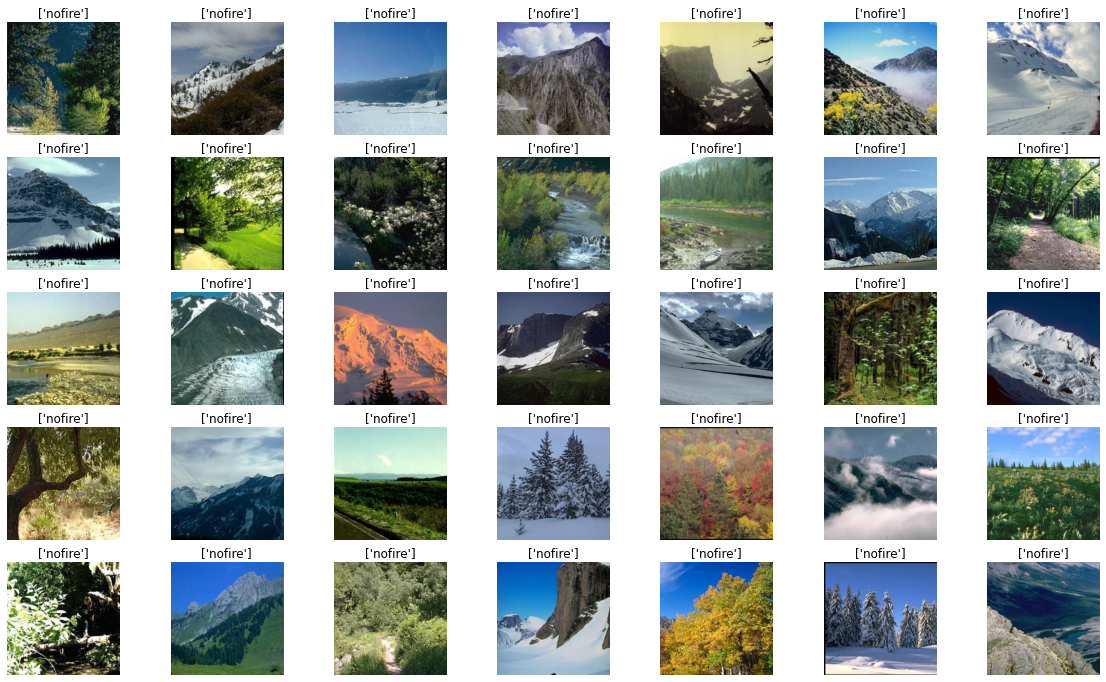

In [11]:
fig, axes = plt.subplots(5, 7, figsize=(20,12))
axes = axes.ravel()

for i in np.arange(0, 35):
    axes[i].imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title([y[i]])

In [12]:
#Data Normalization
X = X/255

## Splitting data into train and test set

In [13]:
# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
print("X_train : ", X_train.shape, "y_train : ", y_train.shape)
print("X_val : ", X_test.shape, "y_val : ", y_test.shape)

X_train :  (1282, 224, 224, 3) y_train :  (1282,)
X_val :  (550, 224, 224, 3) y_val :  (550,)


In [15]:
X_test[1]

array([[[0.0627451 , 0.06666667, 0.08235294],
        [0.0627451 , 0.06666667, 0.08235294],
        [0.06666667, 0.07058824, 0.08627451],
        ...,
        [0.05882353, 0.06666667, 0.07058824],
        [0.0745098 , 0.08235294, 0.08627451],
        [0.1254902 , 0.1372549 , 0.14117647]],

       [[0.00784314, 0.01176471, 0.02745098],
        [0.01176471, 0.01176471, 0.02745098],
        [0.01176471, 0.01568627, 0.03137255],
        ...,
        [0.00784314, 0.01176471, 0.01568627],
        [0.00392157, 0.00392157, 0.00784314],
        [0.03529412, 0.04313725, 0.04705882]],

       [[0.00392157, 0.00392157, 0.01960784],
        [0.00392157, 0.00784314, 0.02352941],
        [0.00392157, 0.00784314, 0.02352941],
        ...,
        [0.00392157, 0.00392157, 0.00784314],
        [0.00784314, 0.01568627, 0.01960784],
        [0.0627451 , 0.07058824, 0.0745098 ]],

       ...,

       [[0.00392157, 0.00784314, 0.00784314],
        [0.02745098, 0.03137255, 0.03137255],
        [0.00784314, 0

In [16]:
# Encoding categorical variable
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [17]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## VGG16

In [18]:
model = VGG16(include_top=True, weights='imagenet')

553476096/553467096 [==============================] - 5s 0us/step


In [19]:
# Here is the architecture of VGG16
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model_input = model.layers[0].input 
model_output = model.layers[-2].output 
predictions = Dense(1, activation='sigmoid')(model_output)

In [21]:
new_model = Model(inputs=model_input, outputs=predictions)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = new_model.fit(X_train, y_train, shuffle = True, epochs= 15, batch_size=50)

Epoch 1/15
26/26 [==============================] - 64s 2s/step - loss: 105.2811 - accuracy: 0.4852
Epoch 2/15
26/26 [==============================] - 37s 1s/step - loss: 0.7548 - accuracy: 0.5000
Epoch 3/15
26/26 [==============================] - 37s 1s/step - loss: 0.7004 - accuracy: 0.5086
Epoch 4/15
26/26 [==============================] - 37s 1s/step - loss: 0.6810 - accuracy: 0.5445
Epoch 5/15
26/26 [==============================] - 37s 1s/step - loss: 0.6855 - accuracy: 0.5546
Epoch 6/15
26/26 [==============================] - 37s 1s/step - loss: 0.5734 - accuracy: 0.7005
Epoch 7/15
26/26 [==============================] - 37s 1s/step - loss: 0.3880 - accuracy: 0.8261
Epoch 8/15
26/26 [==============================] - 37s 1s/step - loss: 0.2889 - accuracy: 0.8822
Epoch 9/15
26/26 [==============================] - 37s 1s/step - loss: 0.1972 - accuracy: 0.9321
Epoch 10/15
26/26 [==============================] - 37s 1s/step - loss: 0.2013 - accuracy: 0.9368
Epoch 11/15
26/26

## Evaluating model

In [28]:
new_model.evaluate(X_test, y_test)

18/18 [==============================] - 5s 275ms/step - loss: 0.4429 - accuracy: 0.8891


[0.44294050335884094, 0.889090895652771]

## Saving model

In [29]:
new_model.save("fire.h5")

## Confusion Matrix

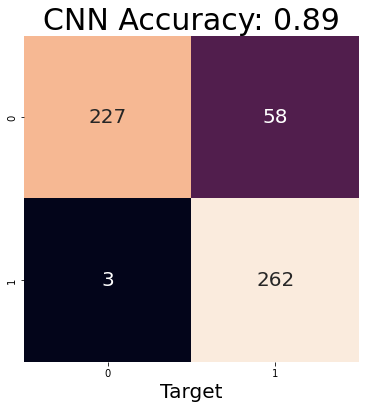

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = new_model.predict(X_test)
#y_pred = (y_pred > 0.5)
y_demo = []
for i in y_pred:
    if i[0] > 0.5:
        y_demo.append([1])
    else:
        y_demo.append([0])
#y_pred = np.argmax(y_pred, axis=1)


plt.subplots(figsize=(6,6))

sns.heatmap(confusion_matrix(y_test,y_demo),annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})

plt.title(f"CNN Accuracy: {round(accuracy_score(y_test,y_demo),2)}",fontsize=30)
plt.xlabel("Target",fontsize=20)
plt.show()

In [32]:
print(classification_report(y_test, y_demo))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       285
           1       0.82      0.99      0.90       265

    accuracy                           0.89       550
   macro avg       0.90      0.89      0.89       550
weighted avg       0.91      0.89      0.89       550



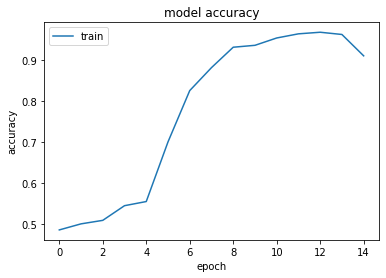

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

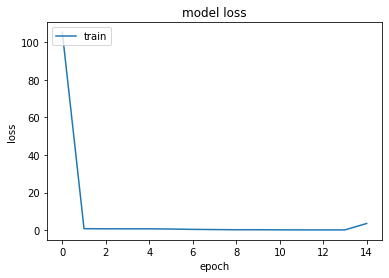

In [43]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Predictions

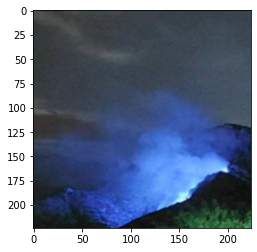

In [33]:
#with fire
sample_img = cv2.imread('/content/forest_fire/Testing/fire/abc170.jpg')
sample_img = cv2.resize(sample_img,(224,224))
plt.imshow(sample_img)
sample_img = np.reshape(sample_img,[1,224,224,3])

In [34]:
new_model.predict(sample_img)

array([[0.]], dtype=float32)

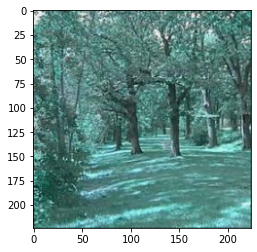

In [35]:
#with fire
sample_img = cv2.imread('/content/forest_fire/Train/nofire/abc194.jpg')
sample_img = cv2.resize(sample_img,(224,224))
plt.imshow(sample_img)
sample_img = np.reshape(sample_img,[1,224,224,3])

In [49]:
int(new_model.predict(sample_img))

1

## Real Time Testing

In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model
from google.colab.patches import cv2_imshow

#Load the saved model
model = load_model('/content/demo.h5')
video = cv2.VideoCapture(0)
while True:
    try:
        _, frame = video.read()
#Convert the captured frame into RGB
        new_img = cv2.imread(frame)
        new_img = cv2.resize(new_img,(224,224))
        new_img = np.array(new_img)
        new_img = new_img/255
        probabilities = model.predict(new_img)[0]

        #Calling the predict method on model to predict 'fire' on the image
        prediction = np.argmax(probabilities)
        #prediction = (prediction > 0.5)
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                print(probabilities[prediction])
    except:
        break
    cv2_imshow(new_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()